In [24]:
# Script for structuring data from https://smear.avaa.csc.fi/download and dumping it to pickle-format

# can only be downoaded in 10-year packages so two files specified for < 10 years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "data/"

infile1 = "par_smeardata_2010-2014.csv"
infile2 = "par_smeardata_2014-2024.csv"

outfile = "par_kuivajarvi.pkl"

In [5]:
flux_data = pd.read_csv(path+infile1)
flux_data = pd.concat([flux_data,pd.read_csv(path+infile2)]).reset_index(drop=True)

#data["timestamp"] = []

cols = flux_data.columns[0:6]
flux_data["timestamp"]=pd.to_datetime(flux_data[cols])
flux_data = flux_data.drop(cols,axis=1)
flux_data = flux_data.set_index("timestamp")

flux_data.to_pickle(path+outfile)
#flux_data.to_csv("")
flux_data

,KVJ_META.PARw20,KVJ_META.PARw10,KVJ_META.PARw02,KVJ_META.PARw05,KVJ_META.PARw07
timestamp,,,,,
2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-10-10 21:30:00,0.02137,NaN,0.10960,0.11777,-0.02797
2019-10-10 22:00:00,0.04410,NaN,-0.06727,-0.03517,0.12927
2019-10-10 22:30:00,0.02687,NaN,0.13687,0.00983,0.01223


In [130]:
turnover_periods = pd.read_csv("data/Turnover_dates.csv", 
                 delimiter=';', 
                 header=None, 
                 names=["Year", "Month", "Day", "Hour", "Minute"], 
                 skipinitialspace=True, 
                 na_values=['', ' ', 'NaN'],
                 dtype=str)


turnover_periods['datetime'] = pd.to_datetime(turnover_perids[['Year', 'Month', 'Day', 'Hour', 'Minute']], errors='coerce')
turnover_periods = turnover_periods[['datetime']]
turnover_periods.to_pickle("data/turnover_periods.pkl")

In [145]:
import pandas as pd

# Step 1: Create the half-hourly timestamp DataFrame
start_time = '2012-01-01 00:00:00'
end_time = '2024-10-09 00:00:00'

# Generate half-hourly timestamps between 2012 and October 9, 2024
timestamps = pd.date_range(start=start_time, end=end_time, freq='30min')

# Create a DataFrame with these timestamps
df_timestamps = pd.DataFrame({'timestamp': timestamps})

turnover_perids['datetime'] = pd.to_datetime(turnover_perids['datetime'])  # Ensure datetime format

# Step 3: Create a column to store labels (initialize with 0s)
df_timestamps['label'] = 0

# Step 4: Loop through each pair of consecutive datetimes and label the periods as 1
for i in range(0, len(turnover_perids) - 1, 2):
    start_period = turnover_perids['datetime'].iloc[i]
    end_period = turnover_perids['datetime'].iloc[i + 1]
    
    # Ensure both start and end are not NaT before applying the labeling
    if pd.notna(start_period) and pd.notna(end_period):
        mask = (df_timestamps['timestamp'] >= start_period) & (df_timestamps['timestamp'] <= end_period)
        df_timestamps.loc[mask, 'label'] = 1
dummy_turnovers=df_timestamps.set_axis(df_timestamps.timestamp).drop("timestamp",axis=1)
dummy_turnovers.to_pickle("data/dummy_turnovers.pkl")

<Axes: xlabel='timestamp,timestamp'>

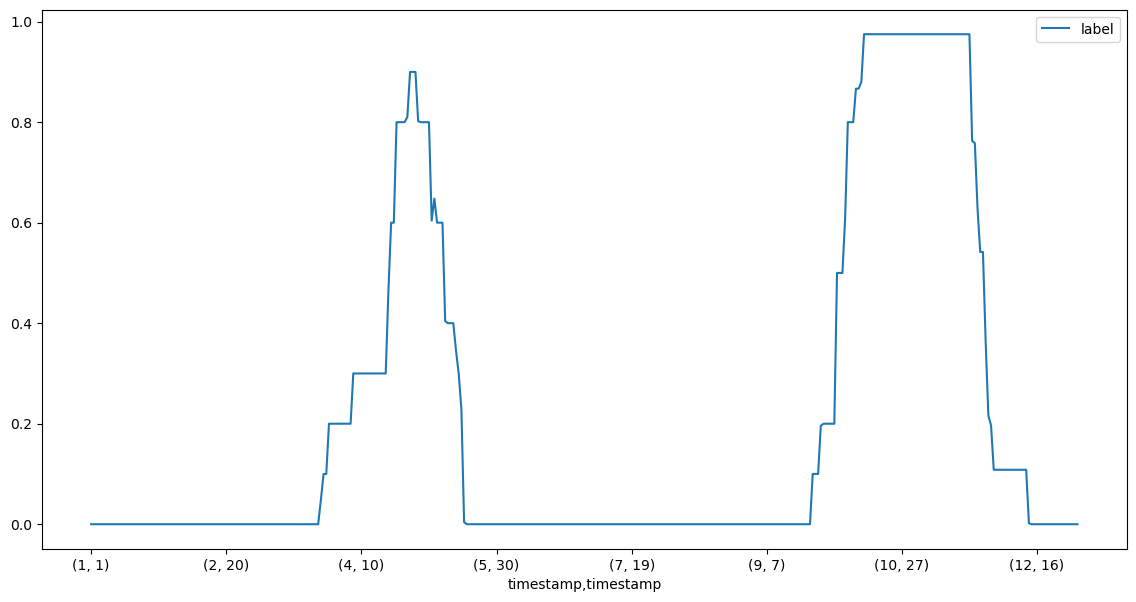

In [175]:
intermediate = dummy_turnovers.resample("1d").mean()
intermediate2 = intermediate.groupby([intermediate.index.month,intermediate.index.day]).mean()
intermediate2.to_pickle("data/mean_turnovers.pkl")
((13/10)*intermediate2).plot()

0